In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("./data/train_all_1.csv")
data = data.fillna(0)
del data[data.columns[0]]
X = data.iloc[:, :-51]
y = data.iloc[:, -1:]

In [18]:
from sklearn.model_selection import train_test_split
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)


In [19]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=1)
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
clf4 = SVC(degree=2, probability=True)
#clf5 = RandomForestClassifier()

clf_labels = ['LR', 'DT', 'KNN']
clfs = [clf1, clf2, clf3]
print('10-fold cross validation:\n')
for clf, label in zip(clfs, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print("ROC AUC: %.2f(+/- %0.2f) [%s]" % (scores.
                                             mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.64(+/- 0.03) [LR]
ROC AUC: 0.57(+/- 0.02) [DT]
ROC AUC: 0.59(+/- 0.03) [KNN]
ROC AUC: 0.66(+/- 0.01) [SVC]
ROC AUC: 0.67(+/- 0.05) [RFC]


In [24]:
from Python.machine_learning.MajorityVoteClassifier import MajorityVoteClassifier

mv_clf = MajorityVoteClassifier(classifiers=[clf1, clf2, clf3])
clf_labels += ['Majority voting']
clfs.append(mv_clf)
scores = cross_val_score(estimator=mv_clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.64 (+/- 0.03) [RFC]


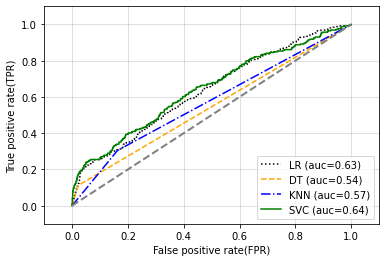

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green', 'cyan', 'olive']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(clfs, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc=%.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.show()